In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#import dataset and check data
data=pd.read_csv("C:/Users/HP/Documents/ML Project/ML Project16/CropProd.csv")
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [4]:
data.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [6]:
data.shape

(246091, 7)

In [7]:
#Check na entries
data.isna().any()

State_Name       False
District_Name    False
Crop_Year        False
Season           False
Crop             False
Area             False
Production        True
dtype: bool

In [8]:
#Production has na entries hence check the count
data['Production'].isna().sum()

3730

In [9]:
import warnings
warnings.simplefilter("ignore")

In [10]:
Frames=[]
for i in list (set(data['District_Name'])):
    data_district=data[data['District_Name']==i]
    data_district['Production'].fillna(data_district['Production'].mean(),inplace=True)
    Frames.append(data_district)
    final_data = pd.concat(Frames)

In [11]:
final_data.isna().any()

State_Name       False
District_Name    False
Crop_Year        False
Season           False
Crop             False
Area             False
Production       False
dtype: bool

In [12]:
#check duplicate and remove
final_data.duplicated(subset=None,keep='first').any()

False

<AxesSubplot:>

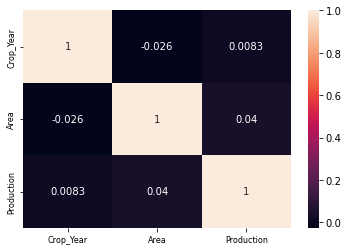

In [13]:
#Correlation
plt.tick_params(labelsize=8)
sns.heatmap(final_data.corr(),annot=True)

In [14]:
#Observation: no high relationship between any variables

In [15]:
#Univariate Analysis
print(final_data['State_Name'].nunique())

33


In [16]:
print(final_data['State_Name'].unique())

['Karnataka' 'Meghalaya' 'Uttar Pradesh' 'Maharashtra' 'Gujarat' 'Assam'
 'Jammu and Kashmir ' 'Bihar' 'Haryana' 'Tamil Nadu' 'Chhattisgarh'
 'Kerala' 'West Bengal' 'Telangana ' 'Arunachal Pradesh' 'Andhra Pradesh'
 'Rajasthan' 'Jharkhand' 'Puducherry' 'Madhya Pradesh' 'Manipur' 'Tripura'
 'Uttarakhand' 'Andaman and Nicobar Islands' 'Punjab' 'Odisha' 'Nagaland'
 'Goa' 'Chandigarh' 'Mizoram' 'Dadra and Nagar Haveli' 'Himachal Pradesh'
 'Sikkim']


In [17]:
#Check the count
final_data['State_Name'].value_counts()

Uttar Pradesh                  33306
Madhya Pradesh                 22943
Karnataka                      21122
Bihar                          18885
Assam                          14628
Odisha                         13575
Tamil Nadu                     13547
Maharashtra                    12628
Rajasthan                      12514
Chhattisgarh                   10709
Andhra Pradesh                  9628
West Bengal                     9613
Gujarat                         8436
Haryana                         5875
Telangana                       5649
Uttarakhand                     4896
Kerala                          4261
Nagaland                        3906
Punjab                          3173
Meghalaya                       2867
Arunachal Pradesh               2546
Himachal Pradesh                2494
Jammu and Kashmir               1634
Tripura                         1412
Manipur                         1267
Jharkhand                       1266
Mizoram                          957
P

In [18]:
#Observation: We have more data from the top rich agriculture states like UP, MP and Karnataka

In [20]:
print(final_data['District_Name'].nunique())

646


In [21]:
print(final_data['District_Name'].unique())

['BENGALURU URBAN' 'EAST GARO HILLS' 'HAPUR' 'AHMEDNAGAR' 'NAVSARI'
 'DHEMAJI' 'BADGAM' 'SARAN' 'LUCKNOW' 'SUPAUL' 'PALWAL' 'SIVAGANGA'
 'BHIWANI' 'JHAJJAR' 'BALRAMPUR' 'KOLLAM' 'UNNAO' 'DINAJPUR DAKSHIN'
 'SULTANPUR' 'BUDAUN' 'NASHIK' 'THIRUVANANTHAPURAM' 'DINDIGUL'
 'LEH LADAKH' 'NALGONDA' 'EAST KAMENG' 'EAST KHASI HILLS' 'VISAKHAPATANAM'
 'JAIPUR' 'SARAIKELA KHARSAWAN' 'BANKURA' 'PONDICHERRY' 'SAMBHAL'
 'DEOGHAR' 'GUMLA' 'BURHANPUR' 'SRIKAKULAM' 'PALGHAR' 'FATEHABAD'
 'SABAR KANTHA' 'KADAPA' 'BAHRAICH' 'KAIMUR (BHABUA)' 'OSMANABAD'
 'CHANGLANG' 'HINGOLI' 'UKHRUL' 'MUZAFFARNAGAR' 'SOUTH TRIPURA'
 'KAUSHAMBI' 'CHATRA' 'ALIRAJPUR' 'UDUPI' 'BISHNUPUR' 'DURG' 'ALAPPUZHA'
 'REWA' 'JAMNAGAR' 'RAJAURI' 'KHAMMAM' '24 PARAGANAS NORTH' 'CHIKMAGALUR'
 'GONDIA' 'DHANBAD' 'DAKSHIN KANNAD' 'ALMORA' 'BANKA' 'MALAPPURAM'
 'AMBEDKAR NAGAR' 'NALANDA' 'LOWER DIBANG VALLEY' 'VAISHALI' 'JIND'
 'NICOBARS' 'S.A.S NAGAR' 'AURAIYA' 'KORAPUT' 'SIROHI' 'JAISALMER'
 'TUENSANG' 'CHHATARPUR' 'RAIGARH' 'KOPPAL' 'S

In [22]:
final_data['District_Name'].value_counts()

BIJAPUR      945
TUMKUR       936
BELGAUM      925
HASSAN       895
BELLARY      887
            ... 
HYDERABAD      8
KHUNTI         6
RAMGARH        6
MUMBAI         1
NAMSAI         1
Name: District_Name, Length: 646, dtype: int64

In [23]:
#Crop producers
print(final_data['Crop_Year'].nunique())
print(final_data['Crop_Year'].max())
print(final_data['Crop_Year'].min())

19
2015
1997


In [24]:
final_data.Crop_Year.value_counts()

2003    17287
2002    16671
2008    14550
2007    14526
2006    14328
2004    14117
2009    14116
2011    14071
2010    14065
2005    13799
2000    13658
2013    13650
2012    13410
2001    13361
1999    12515
1998    11533
2014    10973
1997     8899
2015      562
Name: Crop_Year, dtype: int64

In [25]:
#Season check
final_data['Season'].nunique()

6

In [26]:
final_data['Season'].unique()

array(['Kharif     ', 'Rabi       ', 'Summer     ', 'Whole Year ',
       'Autumn     ', 'Winter     '], dtype=object)

In [27]:
final_data['Season'].min()

'Autumn     '

In [28]:
final_data['Season'].value_counts()

Kharif         95951
Rabi           66987
Whole Year     57305
Summer         14841
Winter          6058
Autumn          4949
Name: Season, dtype: int64

In [29]:
print(final_data['Crop'].nunique())

124


In [30]:
print(final_data.Crop.value_counts().tail(10))

Jobster            9
Perilla            9
Turnip             8
Plums              6
Pear               6
Litchi             6
Coffee             6
Peach              4
Apple              4
Other Dry Fruit    1
Name: Crop, dtype: int64


In [31]:
final_data['Crop'].unique()

array(['Arhar/Tur', 'Black pepper', 'Dry chillies', 'Dry ginger',
       'Groundnut', 'Horse-gram', 'Maize', 'Paddy', 'Ragi', 'Rice',
       'Arecanut', 'Coriander', 'Garlic', 'Sugarcane', 'Turmeric',
       'Castor seed', 'Moong(Green Gram)', 'Niger seed', 'Onion',
       'Peas & beans (Pulses)', 'Potato', 'Rapeseed &Mustard', 'Sesamum',
       'Sunflower', 'Coconut ', 'Other Kharif pulses', 'Small millets',
       'Urad', 'Gram', 'Other  Rabi pulses', 'Banana',
       'Arcanut (Processed)', 'Atcanut (Raw)',
       'Beans & Mutter(Vegetable)', 'Brinjal', 'Grapes', 'Mango',
       'Other Fresh Fruits', 'Papaya', 'Pome Fruit', 'Tomato', 'Jowar',
       'Sweet potato', 'Cowpea(Lobia)', 'Bajra', 'Linseed', 'Cashewnut',
       'Tapioca', 'Cotton(lint)', 'Jute', 'Mesta', 'Soyabean',
       'Pulses total', 'Tobacco', 'Wheat', 'Kapas', 'Citrus Fruit',
       'Pineapple', 'Masoor', 'Barley', 'Total foodgrain',
       'Other Cereals & Millets', 'Safflower', 'other oilseeds',
       'Guar seed',

In [32]:
final_data.Production.describe()

count    2.460910e+05
mean     6.069226e+05
std      1.696894e+07
min      0.000000e+00
25%      9.100000e+01
50%      7.880000e+02
75%      7.870000e+03
max      1.250800e+09
Name: Production, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x20fb9fed9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x20fb9fed040>,
 'boxes': [<matplotlib.lines.Line2D at 0x20fb9fedfa0>],
 'medians': [<matplotlib.lines.Line2D at 0x20fb965cc40>],
 'fliers': [<matplotlib.lines.Line2D at 0x20fb965c7c0>],
 'means': []}

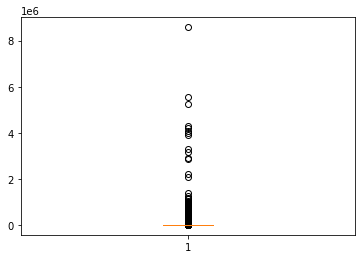

In [33]:
plt.boxplot(final_data.Area)

{'whiskers': [<matplotlib.lines.Line2D at 0x20fba00b700>,
 'caps': [<matplotlib.lines.Line2D at 0x20fb9ffe790>,
 'boxes': [<matplotlib.lines.Line2D at 0x20fb9d80af0>],
 'medians': [<matplotlib.lines.Line2D at 0x20fb9ffe8b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20fb9ffeca0>],
 'means': []}

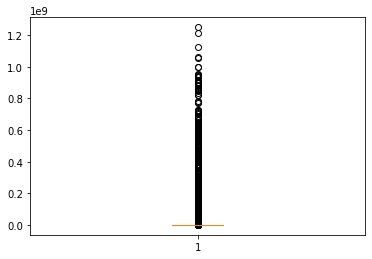

In [34]:
plt.boxplot(final_data.Production)

In [35]:
#Observation: highly skewed and has many outliers

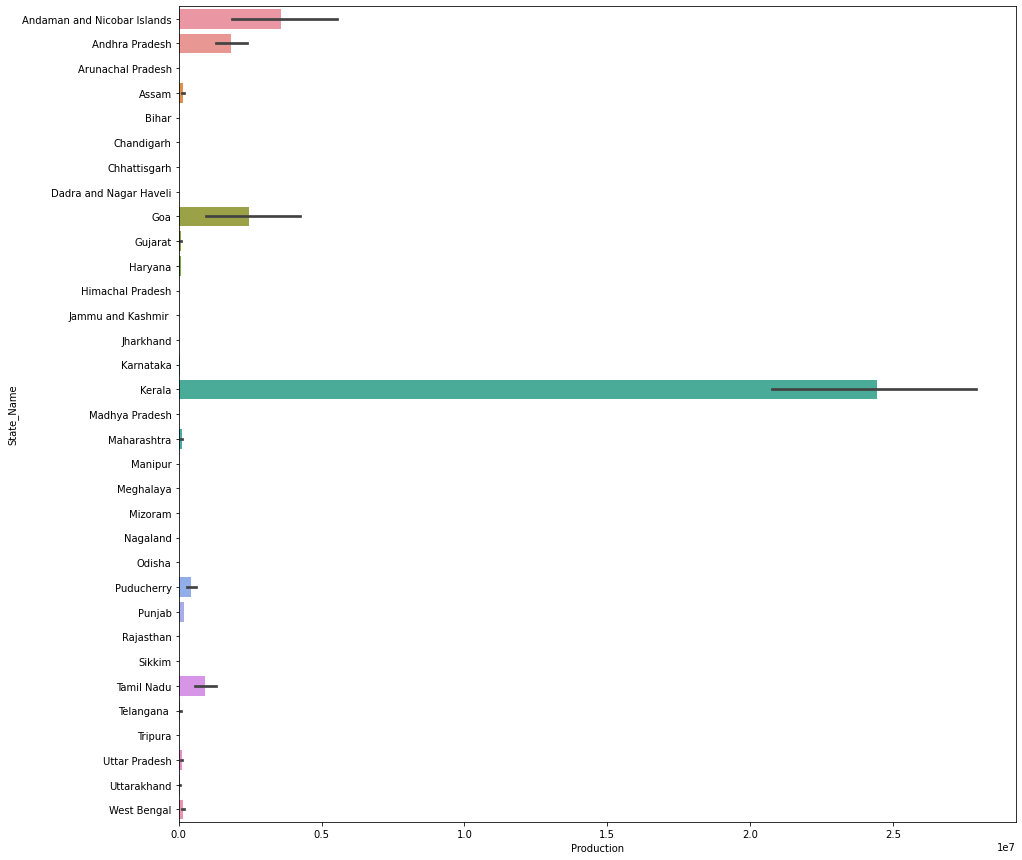

In [36]:
#Bivariate Analysis
plt.figure(figsize=(15,15))
sns.barplot(x=data['Production'],y= data["State_Name"], orient='h');

In [37]:
#New variables creation
#Zone-Wise Production - 1997-2014
north_india = ['Jammu and Kashmir', 'Punjab', 'Himachal Pradesh', 'Haryana', 'Uttarakhand', 'Uttar Pradesh', 'Chandigarh']
east_india = ['Bihar', 'Odisha', 'Jharkhand', 'West Bengal']
south_india = ['Andhra Pradesh', 'Karnataka', 'Kerala' ,'Tamil Nadu', 'Telangana']
west_india = ['Rajasthan' , 'Gujarat', 'Goa','Maharashtra']
central_india = ['Madhya Pradesh', 'Chhattisgarh']
north_east_india = ['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh']
ut_india = ['Andaman and Nicobar Islands', 'Dadra and Nagar Haveli', 'Puducherry']

In [38]:
#define function
def get_zonal_names(row):
    if row['State_Name'].strip() in north_india:
        val = 'North Zone'
    elif row['State_Name'].strip()  in south_india:
        val = 'South Zone'
    elif row['State_Name'].strip()  in east_india:
        val = 'East Zone'
    elif row['State_Name'].strip()  in west_india:
        val = 'West Zone'
    elif row['State_Name'].strip()  in central_india:
        val = 'Central Zone'
    elif row['State_Name'].strip()  in north_east_india:
        val = 'NE Zone'
    elif row['State_Name'].strip()  in ut_india:
        val = 'Union Terr'
    else:
        val = 'No Value'
    return val

final_data['Zones'] = final_data.apply(get_zonal_names, axis=1)
final_data['Zones'].unique()

array(['South Zone', 'NE Zone', 'North Zone', 'West Zone', 'East Zone',
       'Central Zone', 'Union Terr'], dtype=object)

In [39]:
final_data['Zones'].value_counts()

South Zone      54207
North Zone      51468
East Zone       43339
West Zone       33786
Central Zone    33652
NE Zone         28297
Union Terr       1342
Name: Zones, dtype: int64

In [40]:
crop=final_data['Crop']
def cat_crop(crop):
    for i in ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar', 'Paddy','Total foodgrain','Jobster']:
        if crop==i:
            return 'Cereal'
    for i in ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)','Pulses total','Gram']:
        if crop==i:
            return 'Pulses'
    for i in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana']:
        if crop==i:
            return 'Fruits'
    for i in ['Bean','Lab-Lab','Moth','Guar seed','Soyabean','Horse-gram']:
        if crop==i:
            return 'Beans'
    for i in ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion','Tapioca','Colocosia']:
              if crop==i:
                return 'Vegetables'
    for i in ['Perilla','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander','Turmeric','Dry chillies','Cond-spcs other']:
        if crop==i:
            return 'spices'
    for i in ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)','Sannhamp']:
        if crop==i:
            return 'fibres'
    for i in ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut']:
        if crop==i:
            return 'Nuts'
    for i in ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower','Rapeseed &Mustard','Sesamum','Oilseeds total']:
        if crop==i:
            return 'oilseeds'
    for i in ['Tobacco','Coffee','Tea','Sugarcane','Rubber']:
        if crop==i:
            return 'Commercial'

final_data['cat_crop']=final_data['Crop'].apply(cat_crop)

In [41]:
final_data['cat_crop'].value_counts()

Cereal        63800
Pulses        41689
oilseeds      34454
Vegetables    23325
spices        21986
Nuts          11588
Commercial    10716
fibres        10195
Beans          9355
Fruits         6243
Name: cat_crop, dtype: int64

Text(0.5, 1.0, 'Zone wise total production')

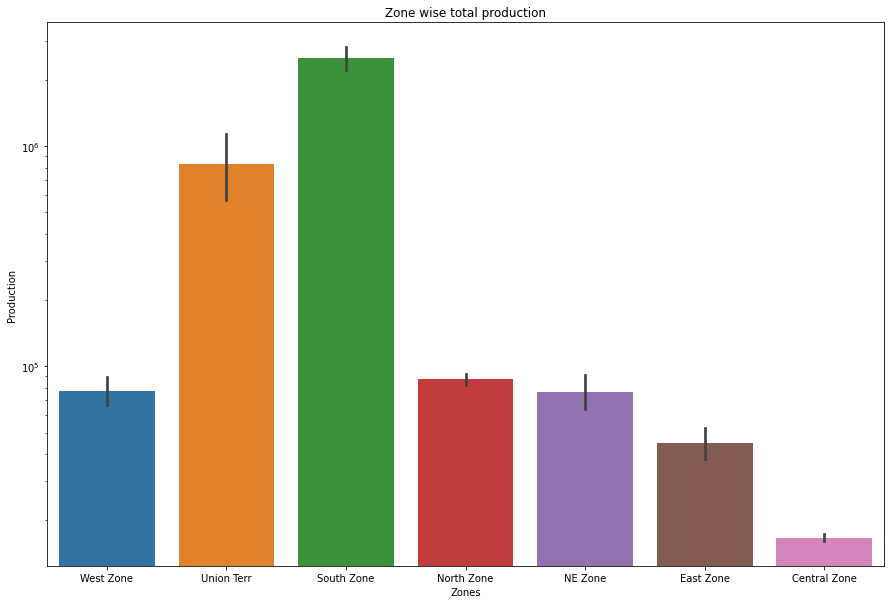

In [42]:
#Production Zone-wise
fig ,ax = plt.subplots(figsize=(15,10))
sns.barplot(final_data.Zones.sort_values(ascending=False) , final_data.Production)
plt.yscale('log')
plt.title('Zone wise total production')

Text(0.5, 1.0, 'Southern-Zone wise Production')

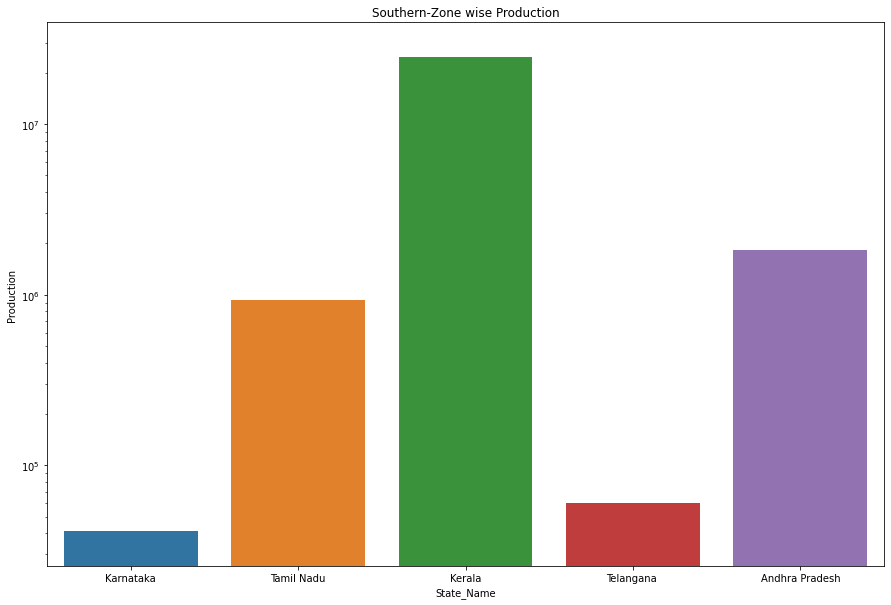

In [43]:
#Analysing the state in south zone which produces the highest production
south_zone =  final_data[(final_data["Zones"] == 'South Zone')]
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(south_zone.State_Name, south_zone.Production,errwidth=0)
plt.yscale('log')
plt.title('Southern-Zone wise Production')

Text(0.5, 1.0, 'Kerala district wise Production')

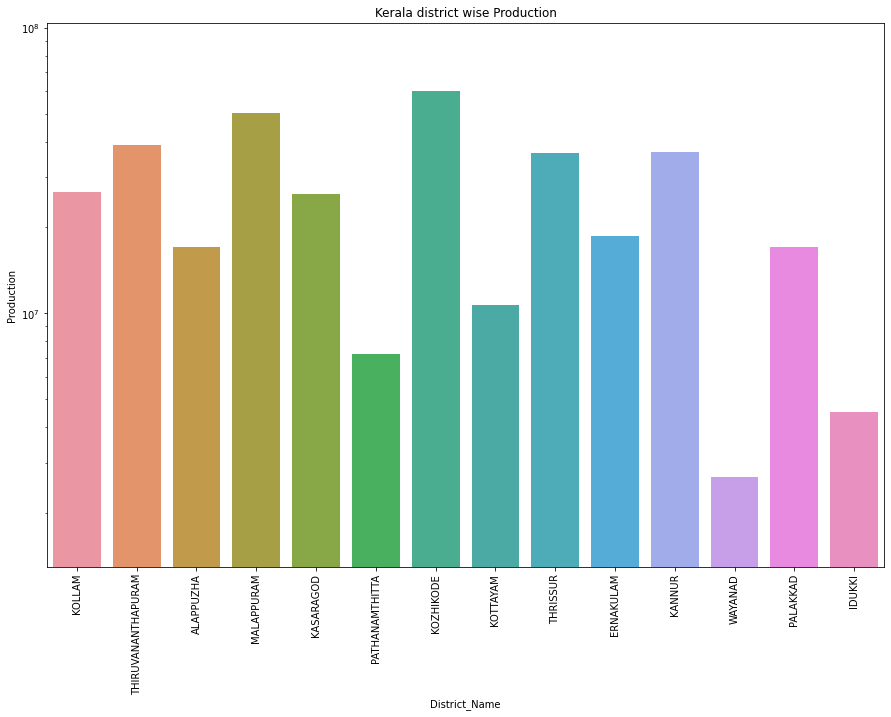

In [44]:
#Analysing the district zone in kerala which gives the highest production
Kerala =  final_data[(final_data["State_Name"] == 'Kerala')]
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(Kerala.District_Name, Kerala.Production,errwidth=0)
plt.yscale('log')
plt.xticks(rotation=90)
plt.title('Kerala district wise Production')

Text(0.5, 1.0, 'Overall Crops vs Production')

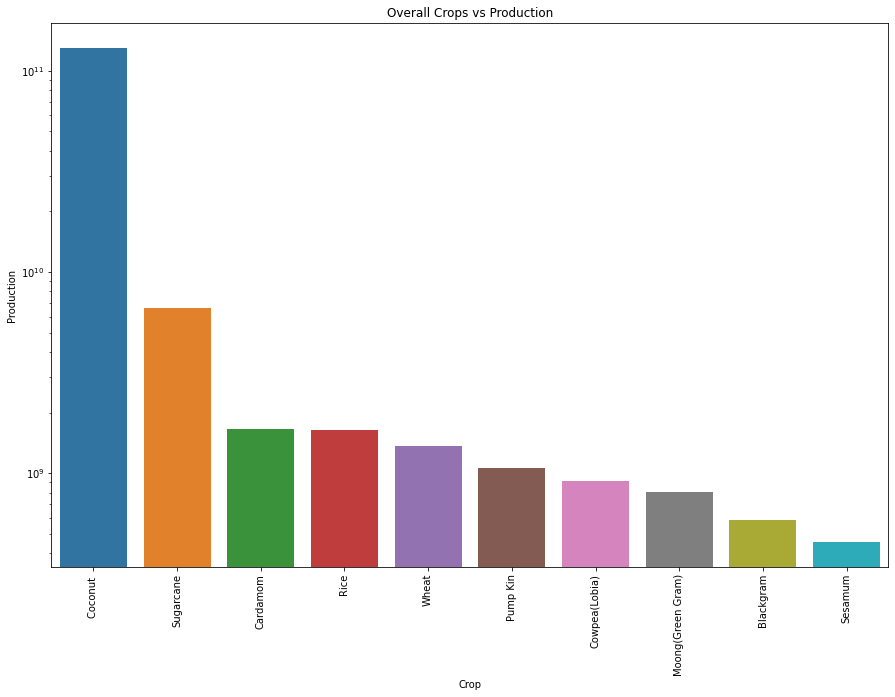

In [45]:
crop = final_data.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
crop 
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(crop.Crop, crop.Production)
plt.yscale('log')
plt.xticks(rotation=90)
plt.title('Overall Crops vs Production')

Text(0.5, 1.0, 'Seasonal Crops vs Production')

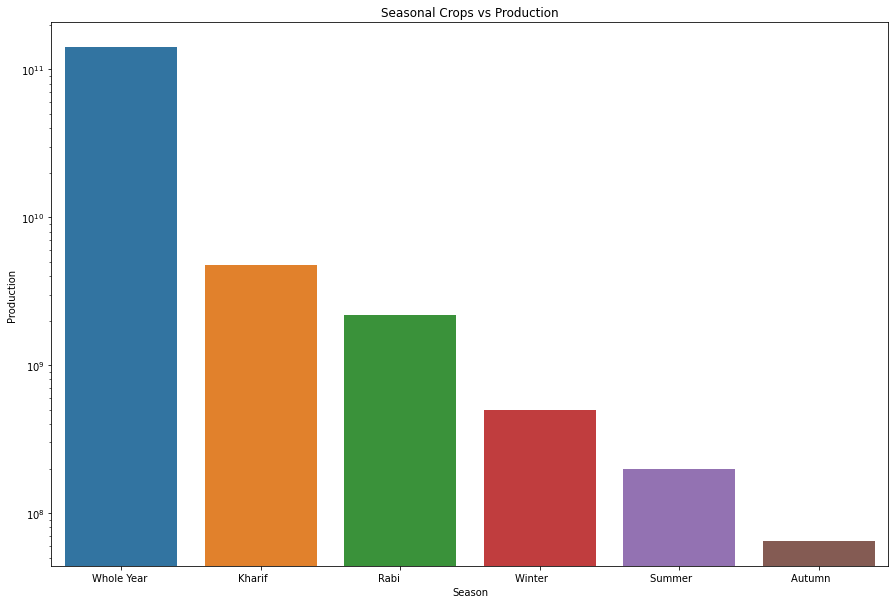

In [46]:
#Seasonal
season = final_data.groupby(by='Season')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(season.Season, season.Production,errwidth=0)
plt.yscale('log')
plt.title('Seasonal Crops vs Production')

<AxesSubplot:xlabel='Crop_Year'>

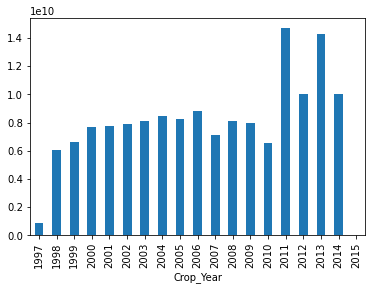

In [47]:
#Year vs Production Analysis
plt.tick_params(labelsize=10)
final_data.groupby('Crop_Year')['Production'].agg('sum').plot.bar()

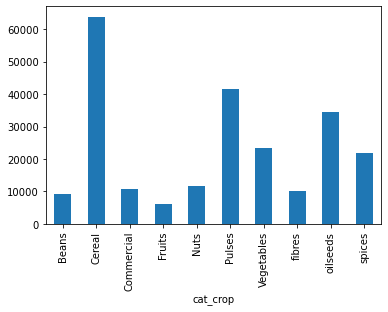

In [48]:
#Crop categories vs Production
final_data.groupby('cat_crop')['Production'].agg("count").plot.bar()
plt.tick_params(labelsize=10)

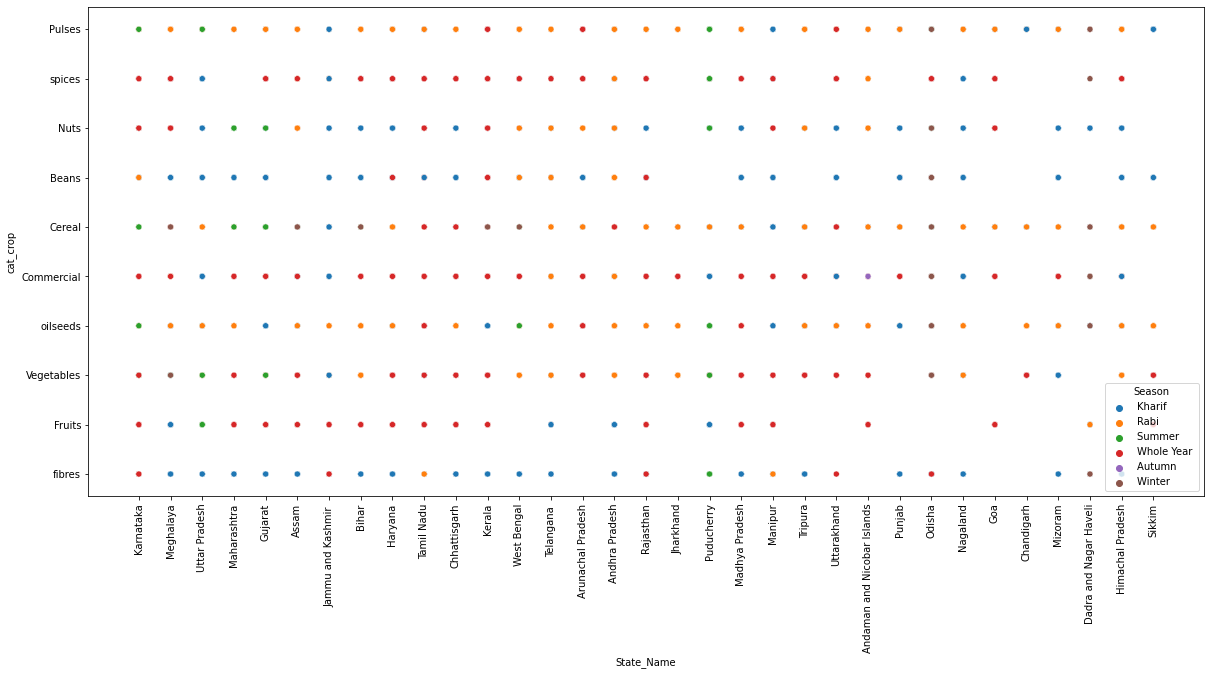

In [49]:
#Season vs Crop categories vs State
plt.figure(figsize=(20,9))
plt.xticks(rotation=90)
sns.scatterplot(data = final_data , x="State_Name", y="cat_crop", hue='Season')
plt.show()

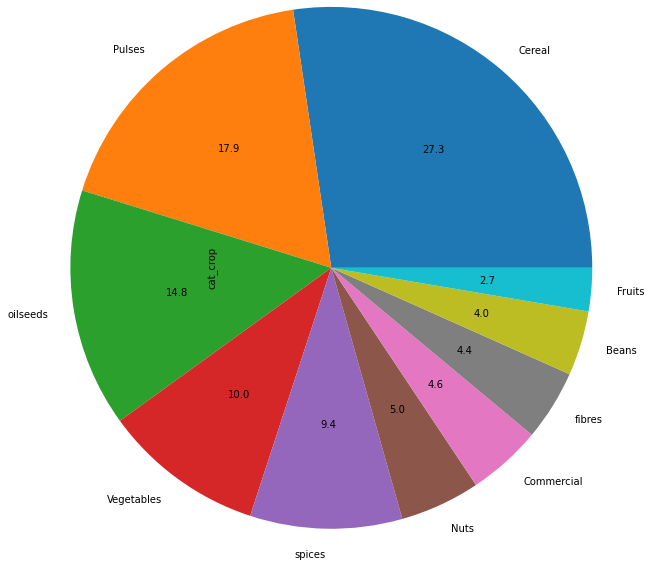

In [50]:
#Percentage of crop categories
cat_crop_count_data=final_data["cat_crop"].value_counts()
cat_crop_count_data.plot(radius=3,kind="pie",autopct="%1.1f",pctdistance=0.6)
plt.tick_params(labelsize=10)

<AxesSubplot:xlabel='State_Name'>

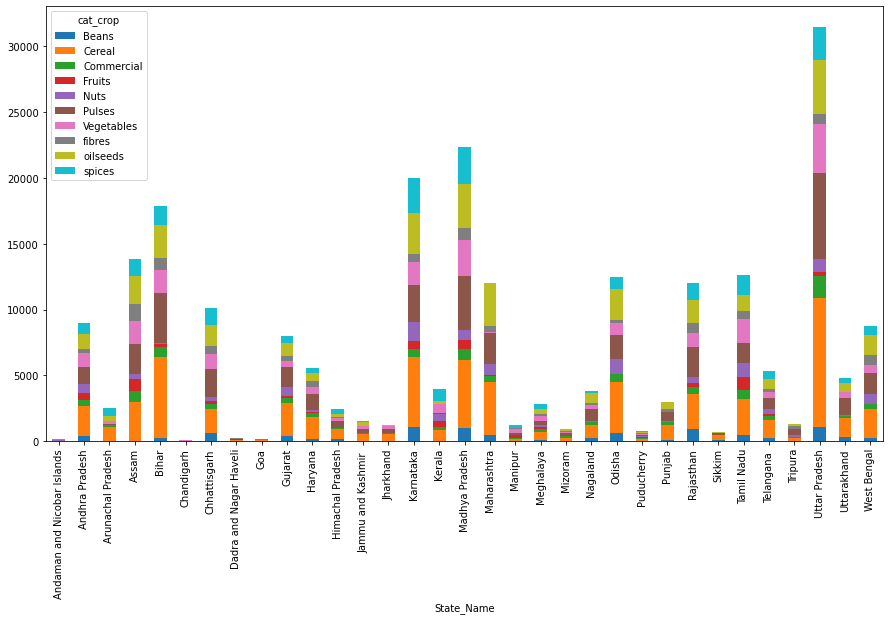

In [51]:
#State that dominates in crop production by producing a variety of crop categories
state_cat_crop= pd.crosstab(final_data['State_Name'],final_data['cat_crop'])
state_cat_crop.plot(kind="bar",stacked=True,figsize=(15,8))

In [52]:
#Which crop is grown in high frequency in India?
final_data['Crop'].value_counts()[:10]

Rice                 15104
Maize                13947
Moong(Green Gram)    10318
Urad                  9850
Sesamum               9046
Groundnut             8834
Sugarcane             7921
Wheat                 7899
Rapeseed &Mustard     7592
Arhar/Tur             7578
Name: Crop, dtype: int64

In [53]:
rice_data=final_data[final_data['Crop']=="Rice"]
print(rice_data.shape)
rice_data.head(4)

(15104, 9)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,cat_crop
80213,Karnataka,BENGALURU URBAN,1997,Kharif,Rice,3507.0,11033.0,South Zone,Cereal
80222,Karnataka,BENGALURU URBAN,1997,Summer,Rice,1252.0,3490.0,South Zone,Cereal
80241,Karnataka,BENGALURU URBAN,1998,Kharif,Rice,5124.0,14255.0,South Zone,Cereal
80254,Karnataka,BENGALURU URBAN,1998,Summer,Rice,2121.0,6847.0,South Zone,Cereal


<AxesSubplot:xlabel='Season', ylabel='Production'>

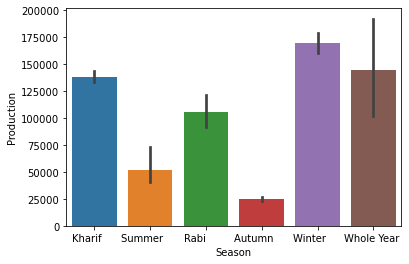

In [54]:
sns.barplot("Season","Production",data=rice_data)

<function matplotlib.pyplot.show(close=None, block=None)>

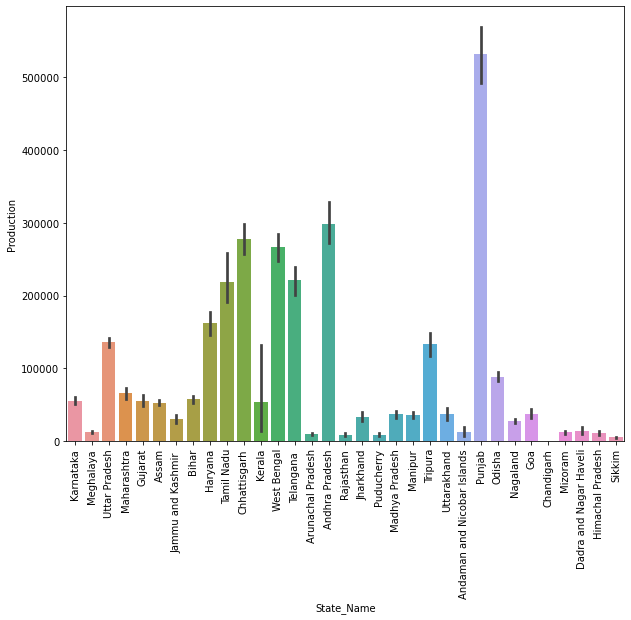

In [55]:
plt.figure(figsize=(10,8))
sns.barplot("State_Name","Production",data=rice_data)
plt.xticks(rotation=90)
plt.show

In [56]:
top_rice_dist = rice_data.groupby("District_Name")["Production"].sum().reset_index().sort_values(by="Production", ascending=False)
top_rice_dist.head(10)

,District_Name,Production
58,BARDHAMAN,3.423998e+07
375,MEDINIPUR WEST,2.919272e+07
613,WEST GODAVARI,2.784531e+07
316,KOLLAM,2.695188e+07
169,EAST GODAVARI,2.469093e+07
495,SANGRUR,2.444800e+07
325,KRISHNA,2.028061e+07
90,BIRBHUM,1.975357e+07
347,LUDHIANA,1.895000e+07
387,MURSHIDABAD,1.840322e+07


<function matplotlib.pyplot.show(close=None, block=None)>

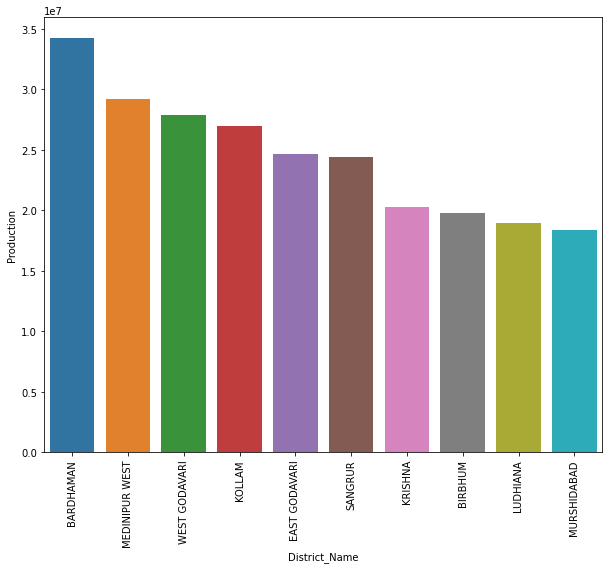

In [57]:
plt.figure(figsize=(10,8))
sns.barplot("District_Name","Production",data=top_rice_dist[:10])
plt.xticks(rotation=90)
plt.show

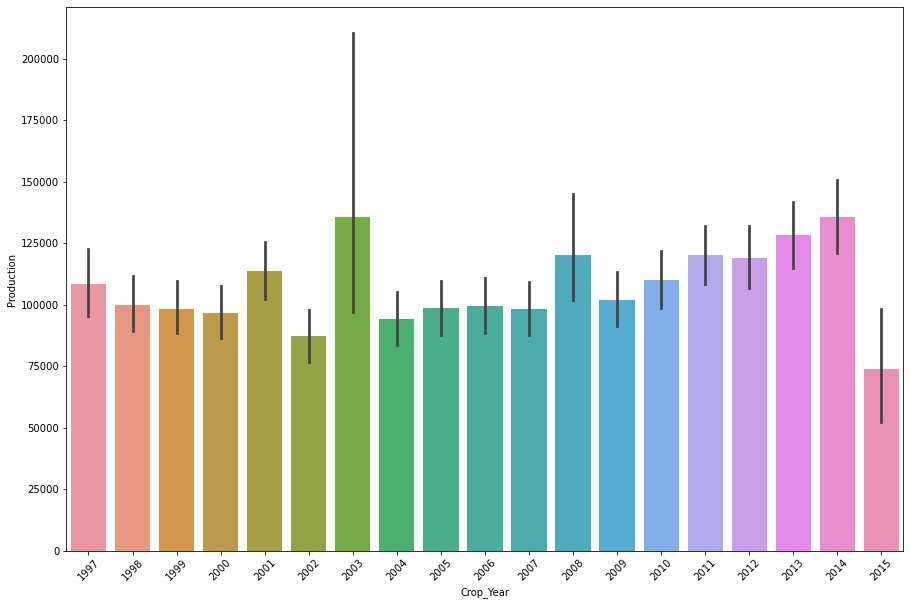

In [58]:
plt.figure(figsize=(15,10))
sns.barplot("Crop_Year","Production",data=rice_data)
plt.xticks(rotation=45)
plt.show()

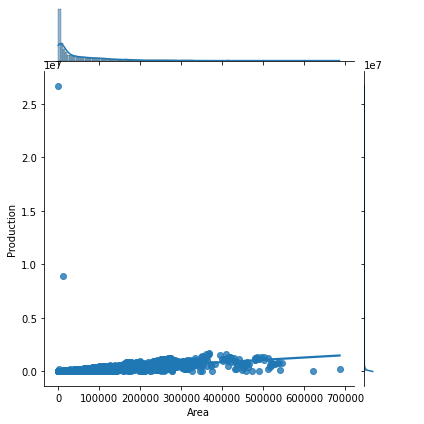

In [59]:
sns.jointplot("Area","Production",data=rice_data,kind="reg")

In [60]:
#Observation:
#Punjab richest state(rice production).
#Bardaman district in Punjab is rich for rice production

In [64]:
df_area=final_data.groupby("State_Name")["Area"].sum().reset_index().sort_values(by="Area",ascending=False)
df_area.head(10)

,State_Name,Area
30,Uttar Pradesh,4.336316e+08
16,Madhya Pradesh,3.298131e+08
17,Maharashtra,3.222062e+08
25,Rajasthan,2.720249e+08
32,West Bengal,2.154052e+08
14,Karnataka,2.029101e+08
9,Gujarat,1.549440e+08
1,Andhra Pradesh,1.315458e+08
4,Bihar,1.282720e+08
24,Punjab,1.267256e+08


Text(0.5, 1.0, 'Indian Agricultural Area Distribution')

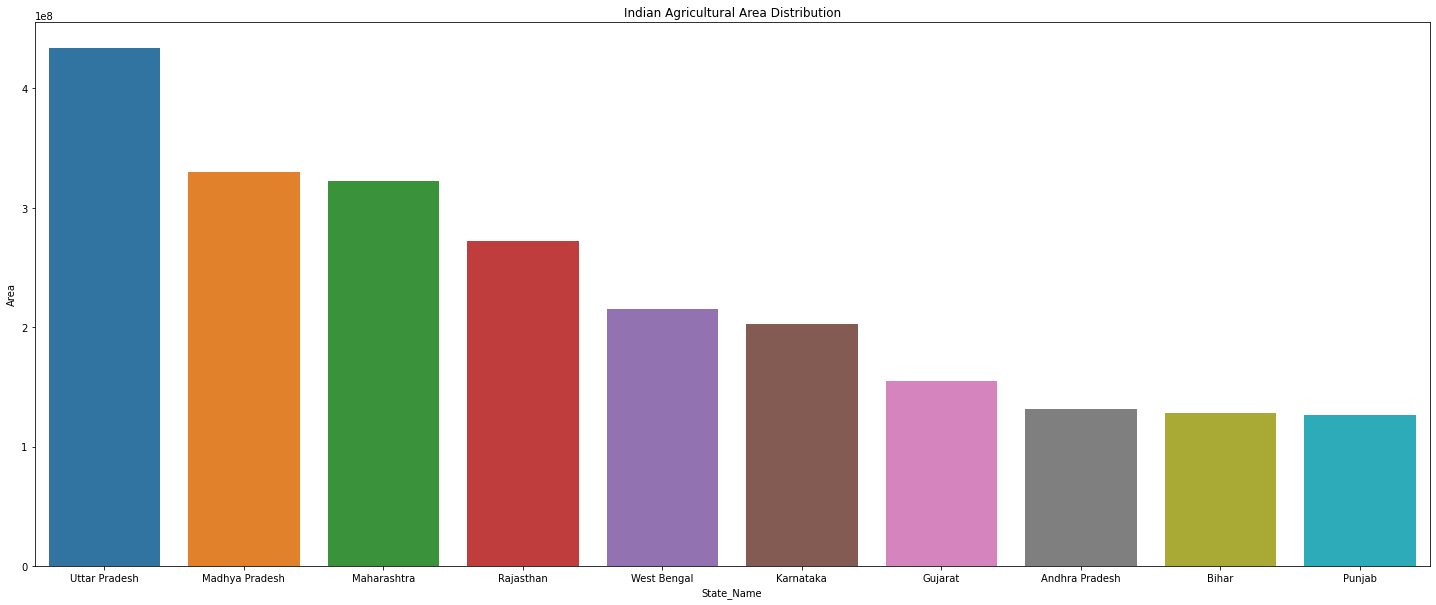

In [67]:
fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(df_area.State_Name.head(10), df_area.Area.head(10), errwidth=0)
plt.title('Indian Agricultural Area Distribution')

In [68]:
#North top crops
North_Zone=final_data[final_data["Zones"]=="North Zone"]
print(North_Zone.shape)

(51468, 9)


,State_Name,Production
5,Uttar Pradesh,3.248159e+09
4,Punjab,5.905425e+08
1,Haryana,4.930824e+08
6,Uttarakhand,1.344728e+08
2,Himachal Pradesh,1.823680e+07
3,Jammu and Kashmir,1.331539e+07
0,Chandigarh,6.467511e+04


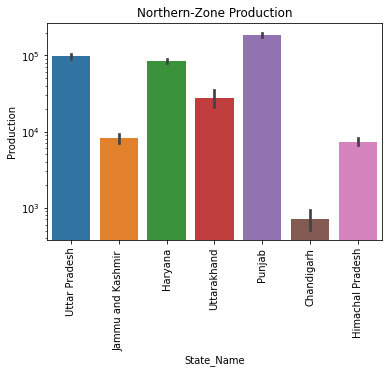

In [69]:
sns.barplot(North_Zone.State_Name,North_Zone.Production)
plt.xticks(rotation=90);
plt.yscale('log')
plt.title('Northern-Zone Production')

North_Zone.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)

Text(0.5, 1.0, 'Crop vs Production in Northern-Zone')

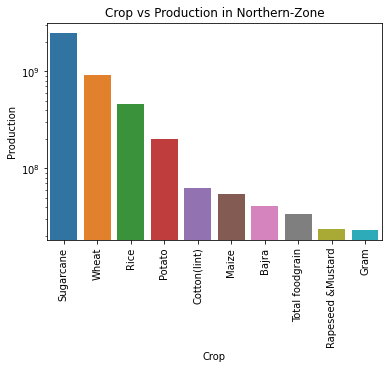

In [70]:
df_NZ= North_Zone.groupby("Crop")["Production"].sum().reset_index().sort_values(by="Production",ascending=False).head(10)
sns.barplot(df_NZ.Crop, df_NZ.Production)
plt.xticks(rotation=90);
plt.yscale('log')
plt.title('Crop vs Production in Northern-Zone')

In [71]:
#Observation:  In North parts Punjab followed by Uttar pradhesh are top producers.

In [72]:
South_Zone=final_data[final_data["Zones"]=="South Zone"]
print(South_Zone.shape)

(54207, 9)


Text(0.5, 1.0, 'Crop vs Production in Southern-Zone')

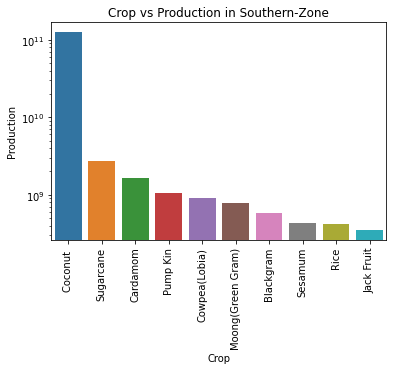

In [73]:
df_SZ= South_Zone.groupby("Crop")["Production"].sum().reset_index().sort_values(by="Production",ascending=False).head(10)
sns.barplot(df_SZ.Crop, df_SZ.Production)
plt.xticks(rotation=90);
plt.yscale('log')
plt.title('Crop vs Production in Southern-Zone')

In [74]:
df_coco = final_data[final_data["Crop"]=="Coconut "]
print(df_coco.shape)
df_coco[:10]

(1985, 9)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,cat_crop
80257,Karnataka,BENGALURU URBAN,1998,Whole Year,Coconut,3347.0,15984.00,South Zone,None
80289,Karnataka,BENGALURU URBAN,1999,Whole Year,Coconut,4383.0,20932.00,South Zone,None
80321,Karnataka,BENGALURU URBAN,2000,Whole Year,Coconut,2959.0,13604.00,South Zone,None
80350,Karnataka,BENGALURU URBAN,2001,Whole Year,Coconut,1959.0,7017.00,South Zone,None
80386,Karnataka,BENGALURU URBAN,2002,Whole Year,Coconut,2008.0,7192.00,South Zone,None
80428,Karnataka,BENGALURU URBAN,2003,Whole Year,Coconut,2565.0,9187.00,South Zone,None
80469,Karnataka,BENGALURU URBAN,2004,Whole Year,Coconut,2498.0,90377.64,South Zone,None
80512,Karnataka,BENGALURU URBAN,2005,Whole Year,Coconut,2871.0,10283.00,South Zone,None
80542,Karnataka,BENGALURU URBAN,2006,Whole Year,Coconut,2385.0,8543.00,South Zone,None
80580,Karnataka,BENGALURU URBAN,2007,Whole Year,Coconut,2310.0,11762.00,South Zone,None


<AxesSubplot:xlabel='Season', ylabel='Production'>

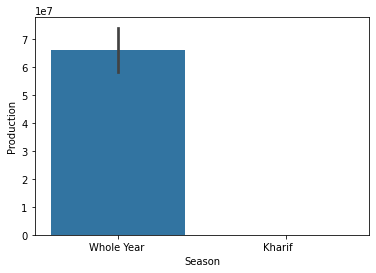

In [75]:
sns.barplot("Season","Production",data=df_coco)

<function matplotlib.pyplot.show(close=None, block=None)>

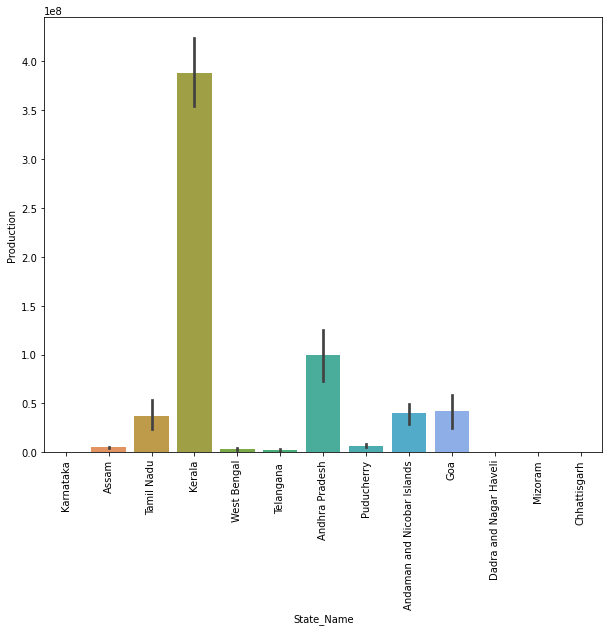

In [76]:
plt.figure(figsize=(10,8))
sns.barplot("State_Name","Production",data=df_coco)
plt.xticks(rotation=90)
plt.show

In [77]:
top_coco_dist = df_coco.groupby("District_Name")["Production"].sum().reset_index().sort_values(by="Production", ascending=False)
top_coco_dist.head(5)

,District_Name,Production
80,KOZHIKODE,1.527871e+10
89,MALAPPURAM,1.451252e+10
134,THIRUVANANTHAPURAM,1.001337e+10
136,THRISSUR,9.920739e+09
66,KANNUR,9.780310e+09


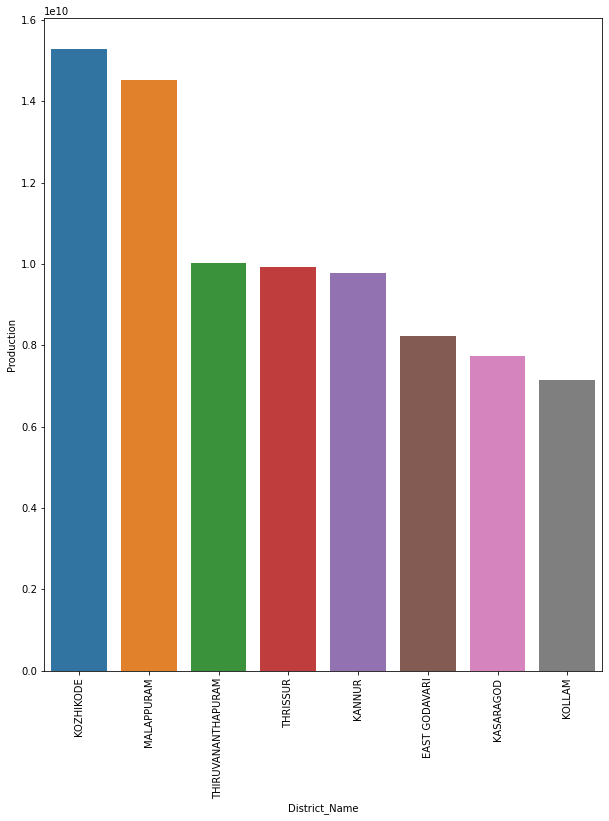

In [78]:
plt.figure(figsize=(10,12))
sns.barplot("District_Name","Production",data=top_coco_dist[:8])
plt.xticks(rotation=90)
plt.show()

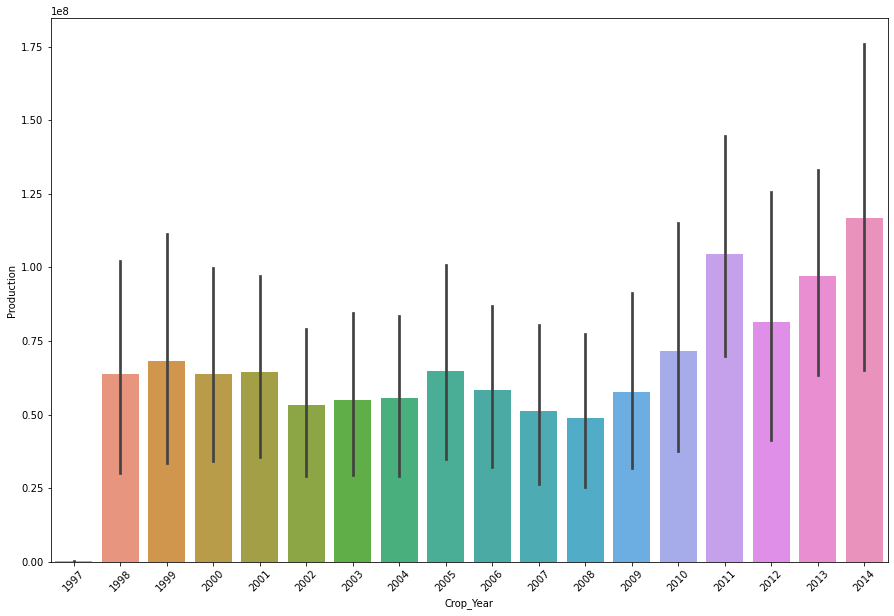

In [79]:
plt.figure(figsize=(15,10))
sns.barplot("Crop_Year","Production",data=df_coco)
plt.xticks(rotation=45)
plt.show()

<Figure size 1080x720 with 0 Axes>

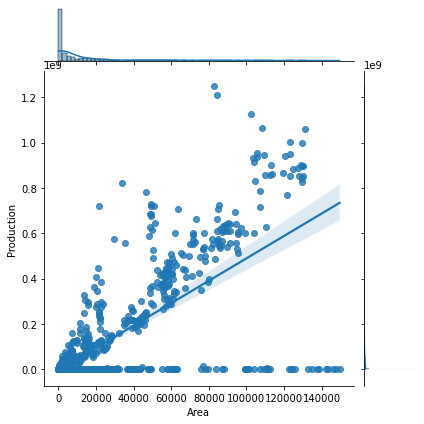

In [80]:
plt.figure(figsize=(15,10))
sns.jointplot("Area","Production",data=df_coco,kind="reg")
plt.xticks(rotation=90)
plt.show()

In [81]:
#Observation:
#Coconut production was yeilded more during 2011 and 2014.
#High coconut cultivation is directly proportional to area under cultivation.

In [82]:
Central_Zone=final_data[final_data["Zones"]=="Central Zone"]
print(Central_Zone.shape)

(33652, 9)


In [83]:
Central_Zone.head(8)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,cat_crop
46265,Chhattisgarh,BALRAMPUR,2011,Kharif,Arhar/Tur,8362.0,3652.000000,Central Zone,Pulses
46266,Chhattisgarh,BALRAMPUR,2011,Kharif,Cotton(lint),6.0,1.000000,Central Zone,fibres
46267,Chhattisgarh,BALRAMPUR,2011,Kharif,Groundnut,1467.0,1846.000000,Central Zone,Nuts
46268,Chhattisgarh,BALRAMPUR,2011,Kharif,Horse-gram,2742.0,661.000000,Central Zone,Beans
46269,Chhattisgarh,BALRAMPUR,2011,Kharif,Jowar,732.0,478.000000,Central Zone,Cereal
46270,Chhattisgarh,BALRAMPUR,2011,Kharif,Jute,18.0,89161.239243,Central Zone,fibres
46271,Chhattisgarh,BALRAMPUR,2011,Kharif,Maize,18265.0,25481.000000,Central Zone,Cereal
46272,Chhattisgarh,BALRAMPUR,2011,Kharif,Mesta,120.0,227.000000,Central Zone,fibres


Text(0.5, 1.0, 'Top crop produced in Central zone')

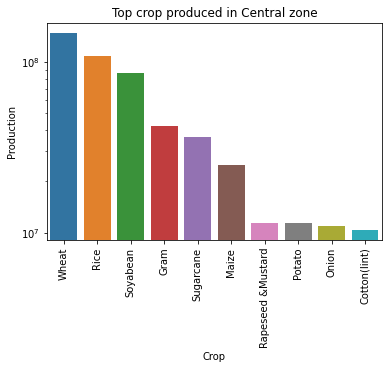

In [84]:
df_central_crop = Central_Zone.groupby("Crop")["Production"].sum().reset_index().sort_values(by="Production",ascending=False).head(10)
sns.barplot(df_central_crop.Crop,df_central_crop.Production)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("Top crop produced in Central zone")

,State_Name,Production
1,Madhya Pradesh,4.555427e+08
0,Chhattisgarh,1.055266e+08


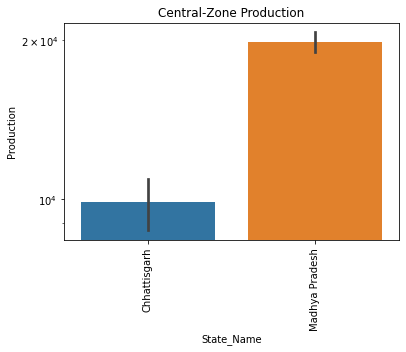

In [85]:
sns.barplot(Central_Zone.State_Name,Central_Zone.Production)
plt.xticks(rotation=90);
plt.yscale('log')
plt.title('Central-Zone Production')

Central_Zone.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)

In [86]:
#Observation: Wheat is the top crop produced in Central Zone

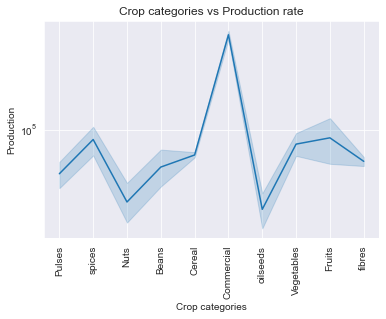

,cat_crop,Production
2,Commercial,6.612507e+09
1,Cereal,3.944948e+09
9,spices,1.827835e+09
5,Pulses,1.799547e+09
6,Vegetables,1.775118e+09
8,oilseeds,7.527392e+08
7,fibres,5.581822e+08
3,Fruits,5.360099e+08
0,Beans,4.590149e+08
4,Nuts,2.913803e+08


In [87]:
sns.set_style('darkgrid')
sns.lineplot(data=final_data, x='cat_crop', y='Production')

plt.title('Crop categories vs Production rate')
plt.xlabel('Crop categories')
plt.ylabel('Production')
plt.xticks(rotation=90);
plt.yscale('log')

plt.show()

final_data.groupby(by='cat_crop')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)

In [88]:
#Observation: Commercial crops has given the largest production